In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000809.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

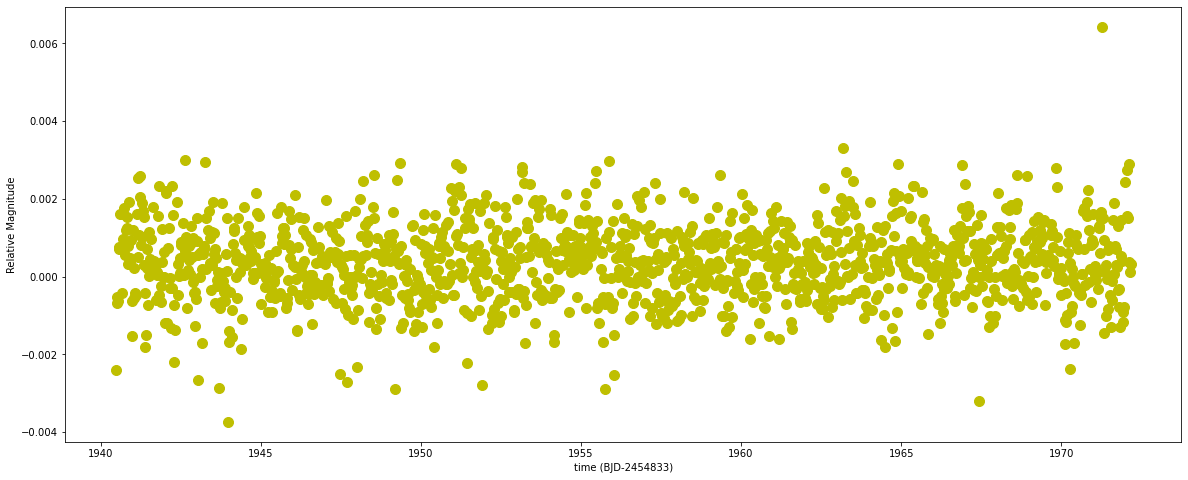

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000809')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200817 14:10:26 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200817 14:10:26 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200817 14:10:27 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 14:10:27 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200817 14:10:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13342906.32181, reduced chisq = 9861.71938
[I 200817 14:10:30 png:696] plotting phased LC with period 0.804303, epoch 1940.47762
[I 200817 14:10:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13514171.25417, reduced chisq = 9988.30100
[I 200817 14:10:30 png:696] plotting phased LC with period 0.402152, epoch 1940.47762
[I 200817 14:10:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13412103.72480, reduced chisq = 9912.86306
[I 200817 14:10:30 png:696] plotting phased LC with period 1.608607, epoch 1940.47762
[I 200817 14:10:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13402714.27934, reduced chisq = 9913.25021
[I 200817 14:10:30 png:696] plotting phased LC with period 0.185319, epoch 1940.47762
[I 200817 14:10:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13343230.20606, reduced chisq = 9869.25311
[I 200817 14:10:30 png:696] plotting phased LC with period 0.21126

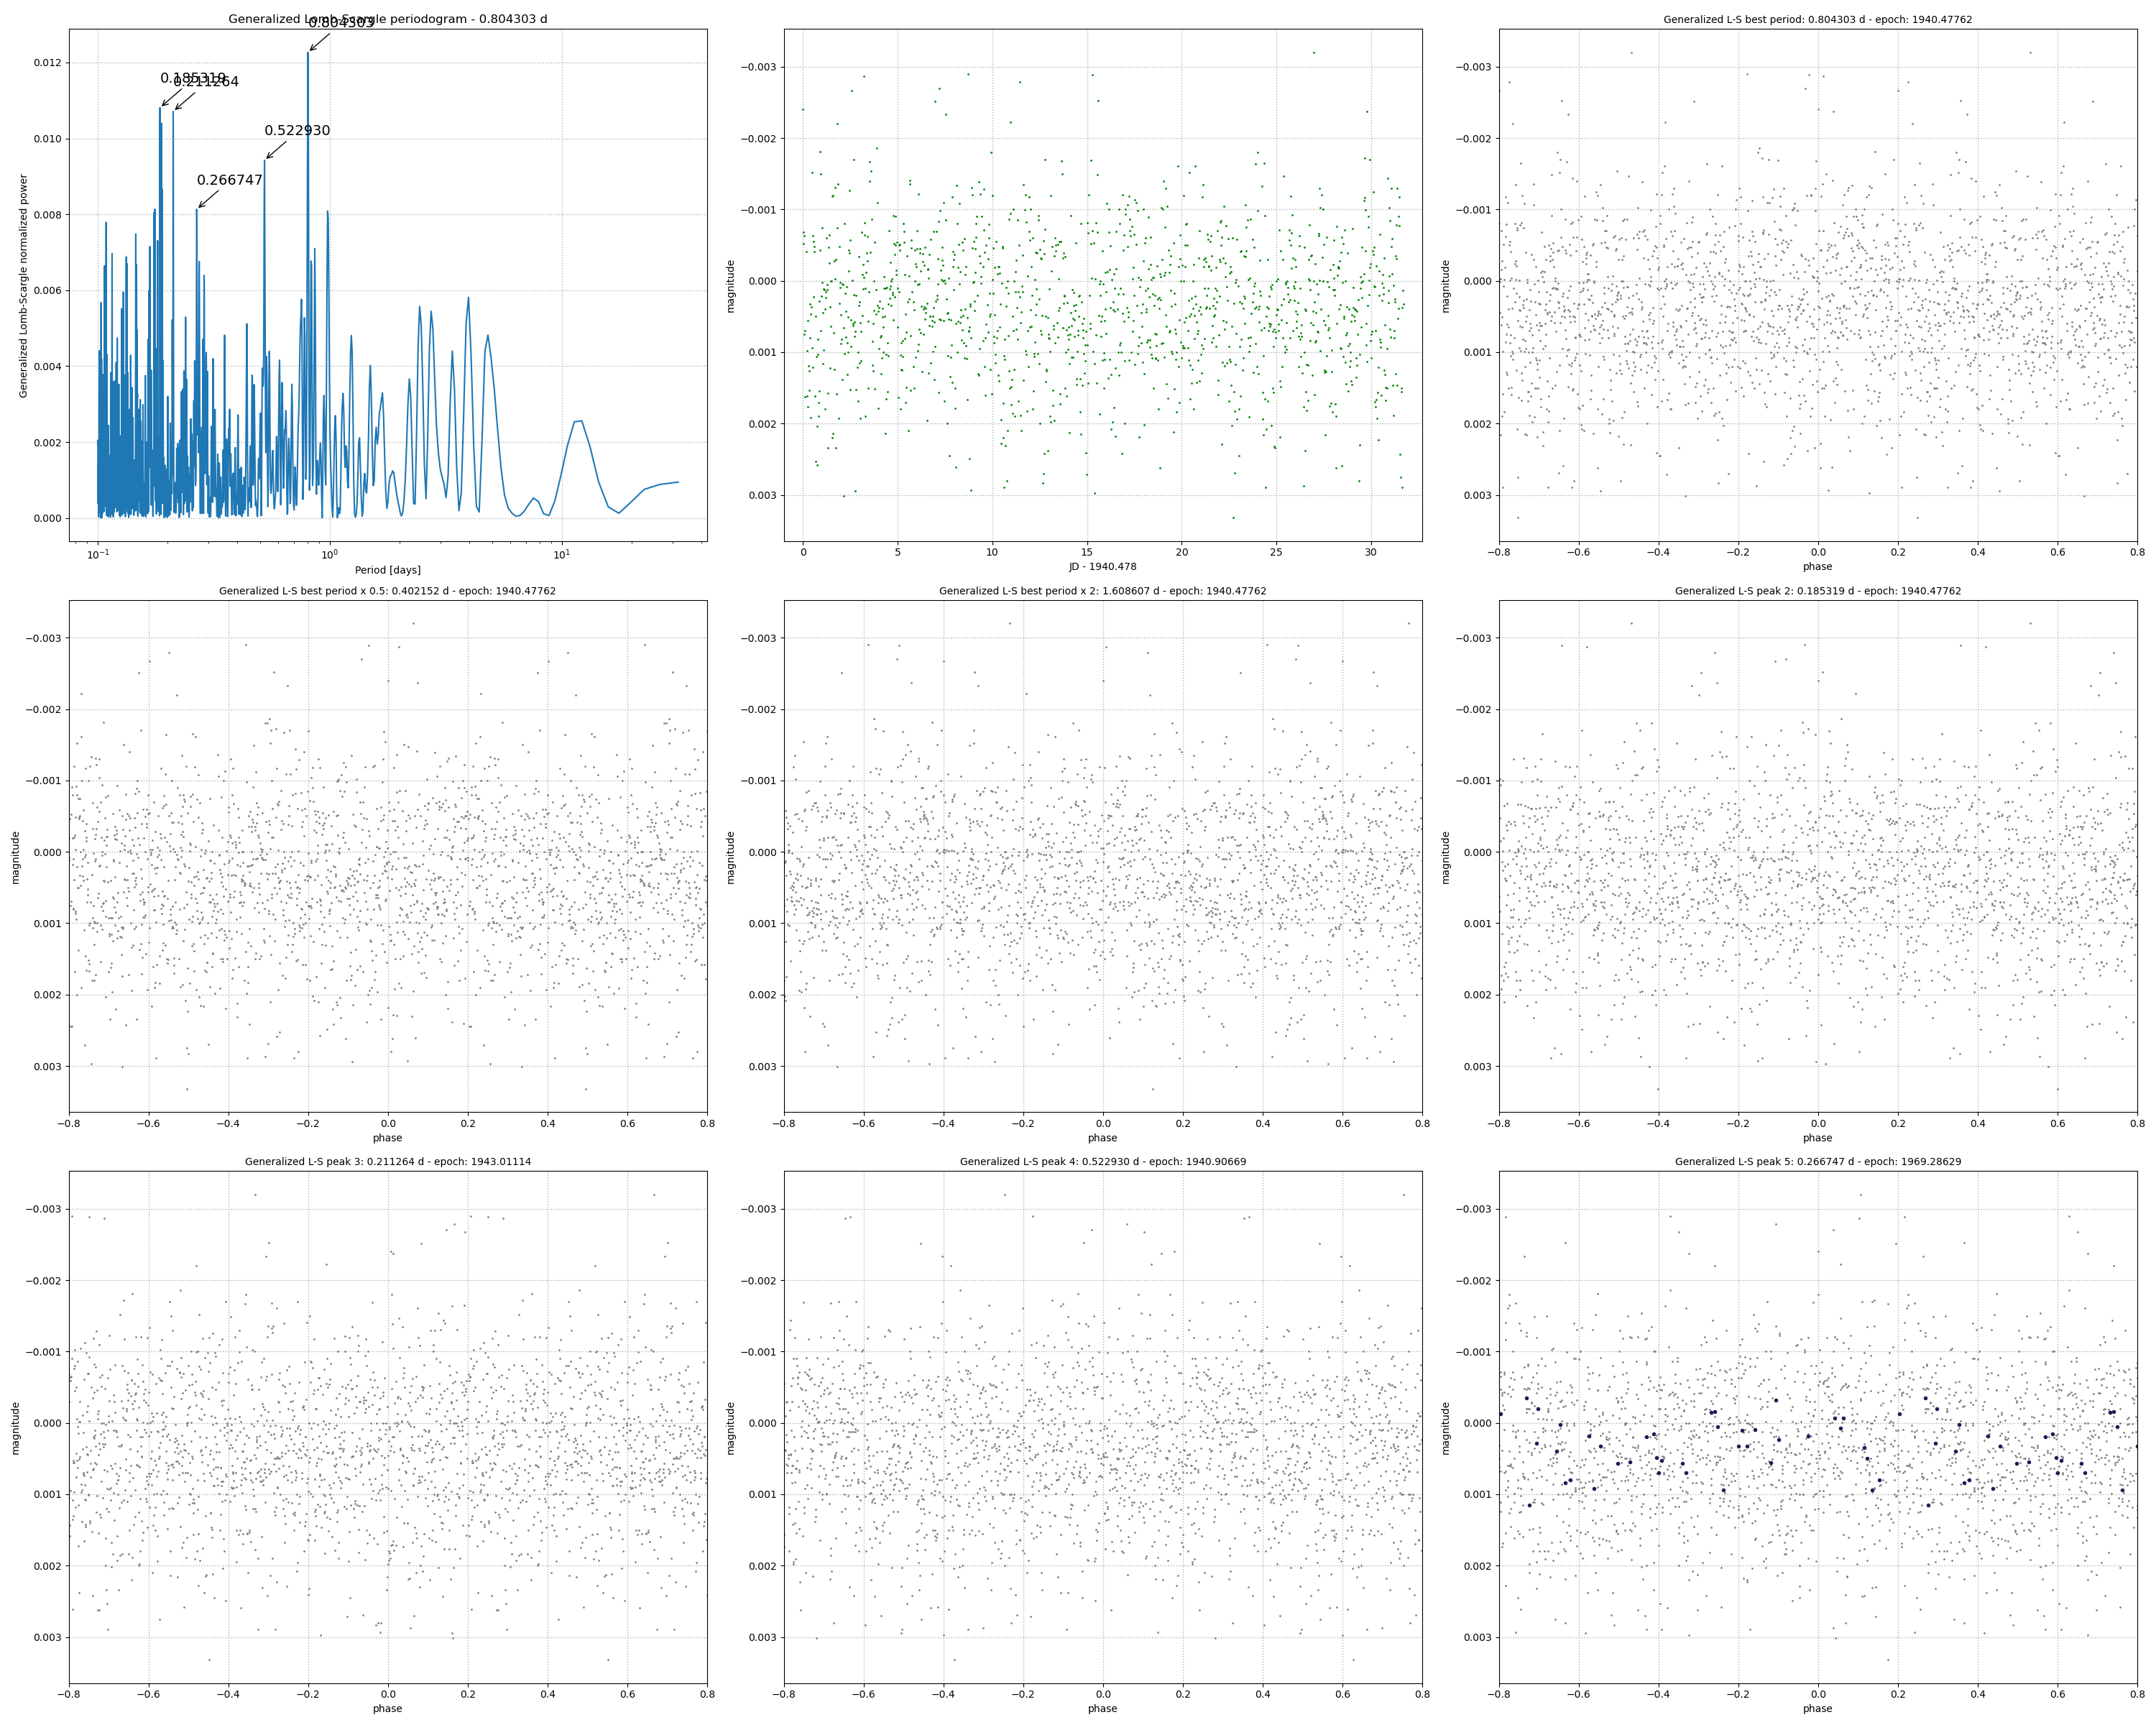

In [8]:
from IPython.display import Image
Image('0000809-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.8043034809644651,
 'bestlspval': 0.012267169009966114,
 'nbestpeaks': 5,
 'nbestlspvals': [0.012267169009966114,
  0.010809813055471565,
  0.010711121772030388,
  0.009425615137832853,
  0.008131246099470585],
 'nbestperiods': [0.8043034809644651,
  0.1853190476608183,
  0.21126371433333285,
  0.5229299859735962,
  0.26674711405723844],
 'lspvals': array([0.00094454, 0.00088237, 0.00075197, ..., 0.00109947, 0.002049  ,
        0.00188707]),
 'omegas': array([ 0.19827305,  0.23792767,  0.27758228, ..., 62.7335946 ,
        62.77324921, 62.81290382]),
 'periods': array([31.68955715, 26.40796429, 22.63539796, ...,  0.10015663,
         0.10009336,  0.10003017]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.8043034809644651, 0.1853190476608183, 0.21126371433333285, 0.5229299859735962, 0.26674711405723844] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200817 14:10:53 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200817 14:10:53 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889034195607261e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200817 14:10:53 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200817 14:10:53 abls:969] new minfreq: 0.06311227356485809, maxfreq: 10.0
[I 200817 14:10:53 abls:980] using 6 workers...
[I 200817 14:10:53 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200817 14:10:53 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200817 14:10:53 abls:1090] worker 3: minfreq = 3.393074, nfreqs = 21105
[I 200817 14:10:53 abls:1090] worker 4: minfreq = 5.058054, nfreqs = 21105
[I 200817 14:10:53 abls:1090] worker 5: minfreq = 6.723035, nfreqs = 21105
[I 200817 14:10:53 abls:1090] worker 6: minfreq = 8.388016, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200817 14:11:05 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200817 14:11:05 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 14:11:05 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200817 14:11:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 13472388.27017, reduced chisq = 9964.78422
[I 200817 14:11:08 png:696] plotting phased LC with period 3.961195, epoch 1948.42551
[I 200817 14:11:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 13440691.40364, reduced chisq = 9941.33980
[I 200817 14:11:08 png:696] plotting phased LC with period 1.980597, epoch 1968.20340
[I 200817 14:11:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 13433879.08982, reduced chisq = 9936.30110
[I 200817 14:11:08 png:696] plotting phased LC with period 7.922389, epoch 1948.38465
[I 200817 14:11:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 13445784.95101, reduced chisq = 9937.75680
[I 200817 14:11:08 png:696] plotting phased LC with period 2.005668, epoch 1966.54842
[I 200817 14:11:08 nonphysical:216] spline fit done. nknots = 13,  chisq = 13506925.47760, reduced chisq = 9990.32950
[I 200817 14:11:08 png:696] plotting phased LC with period 15.8447

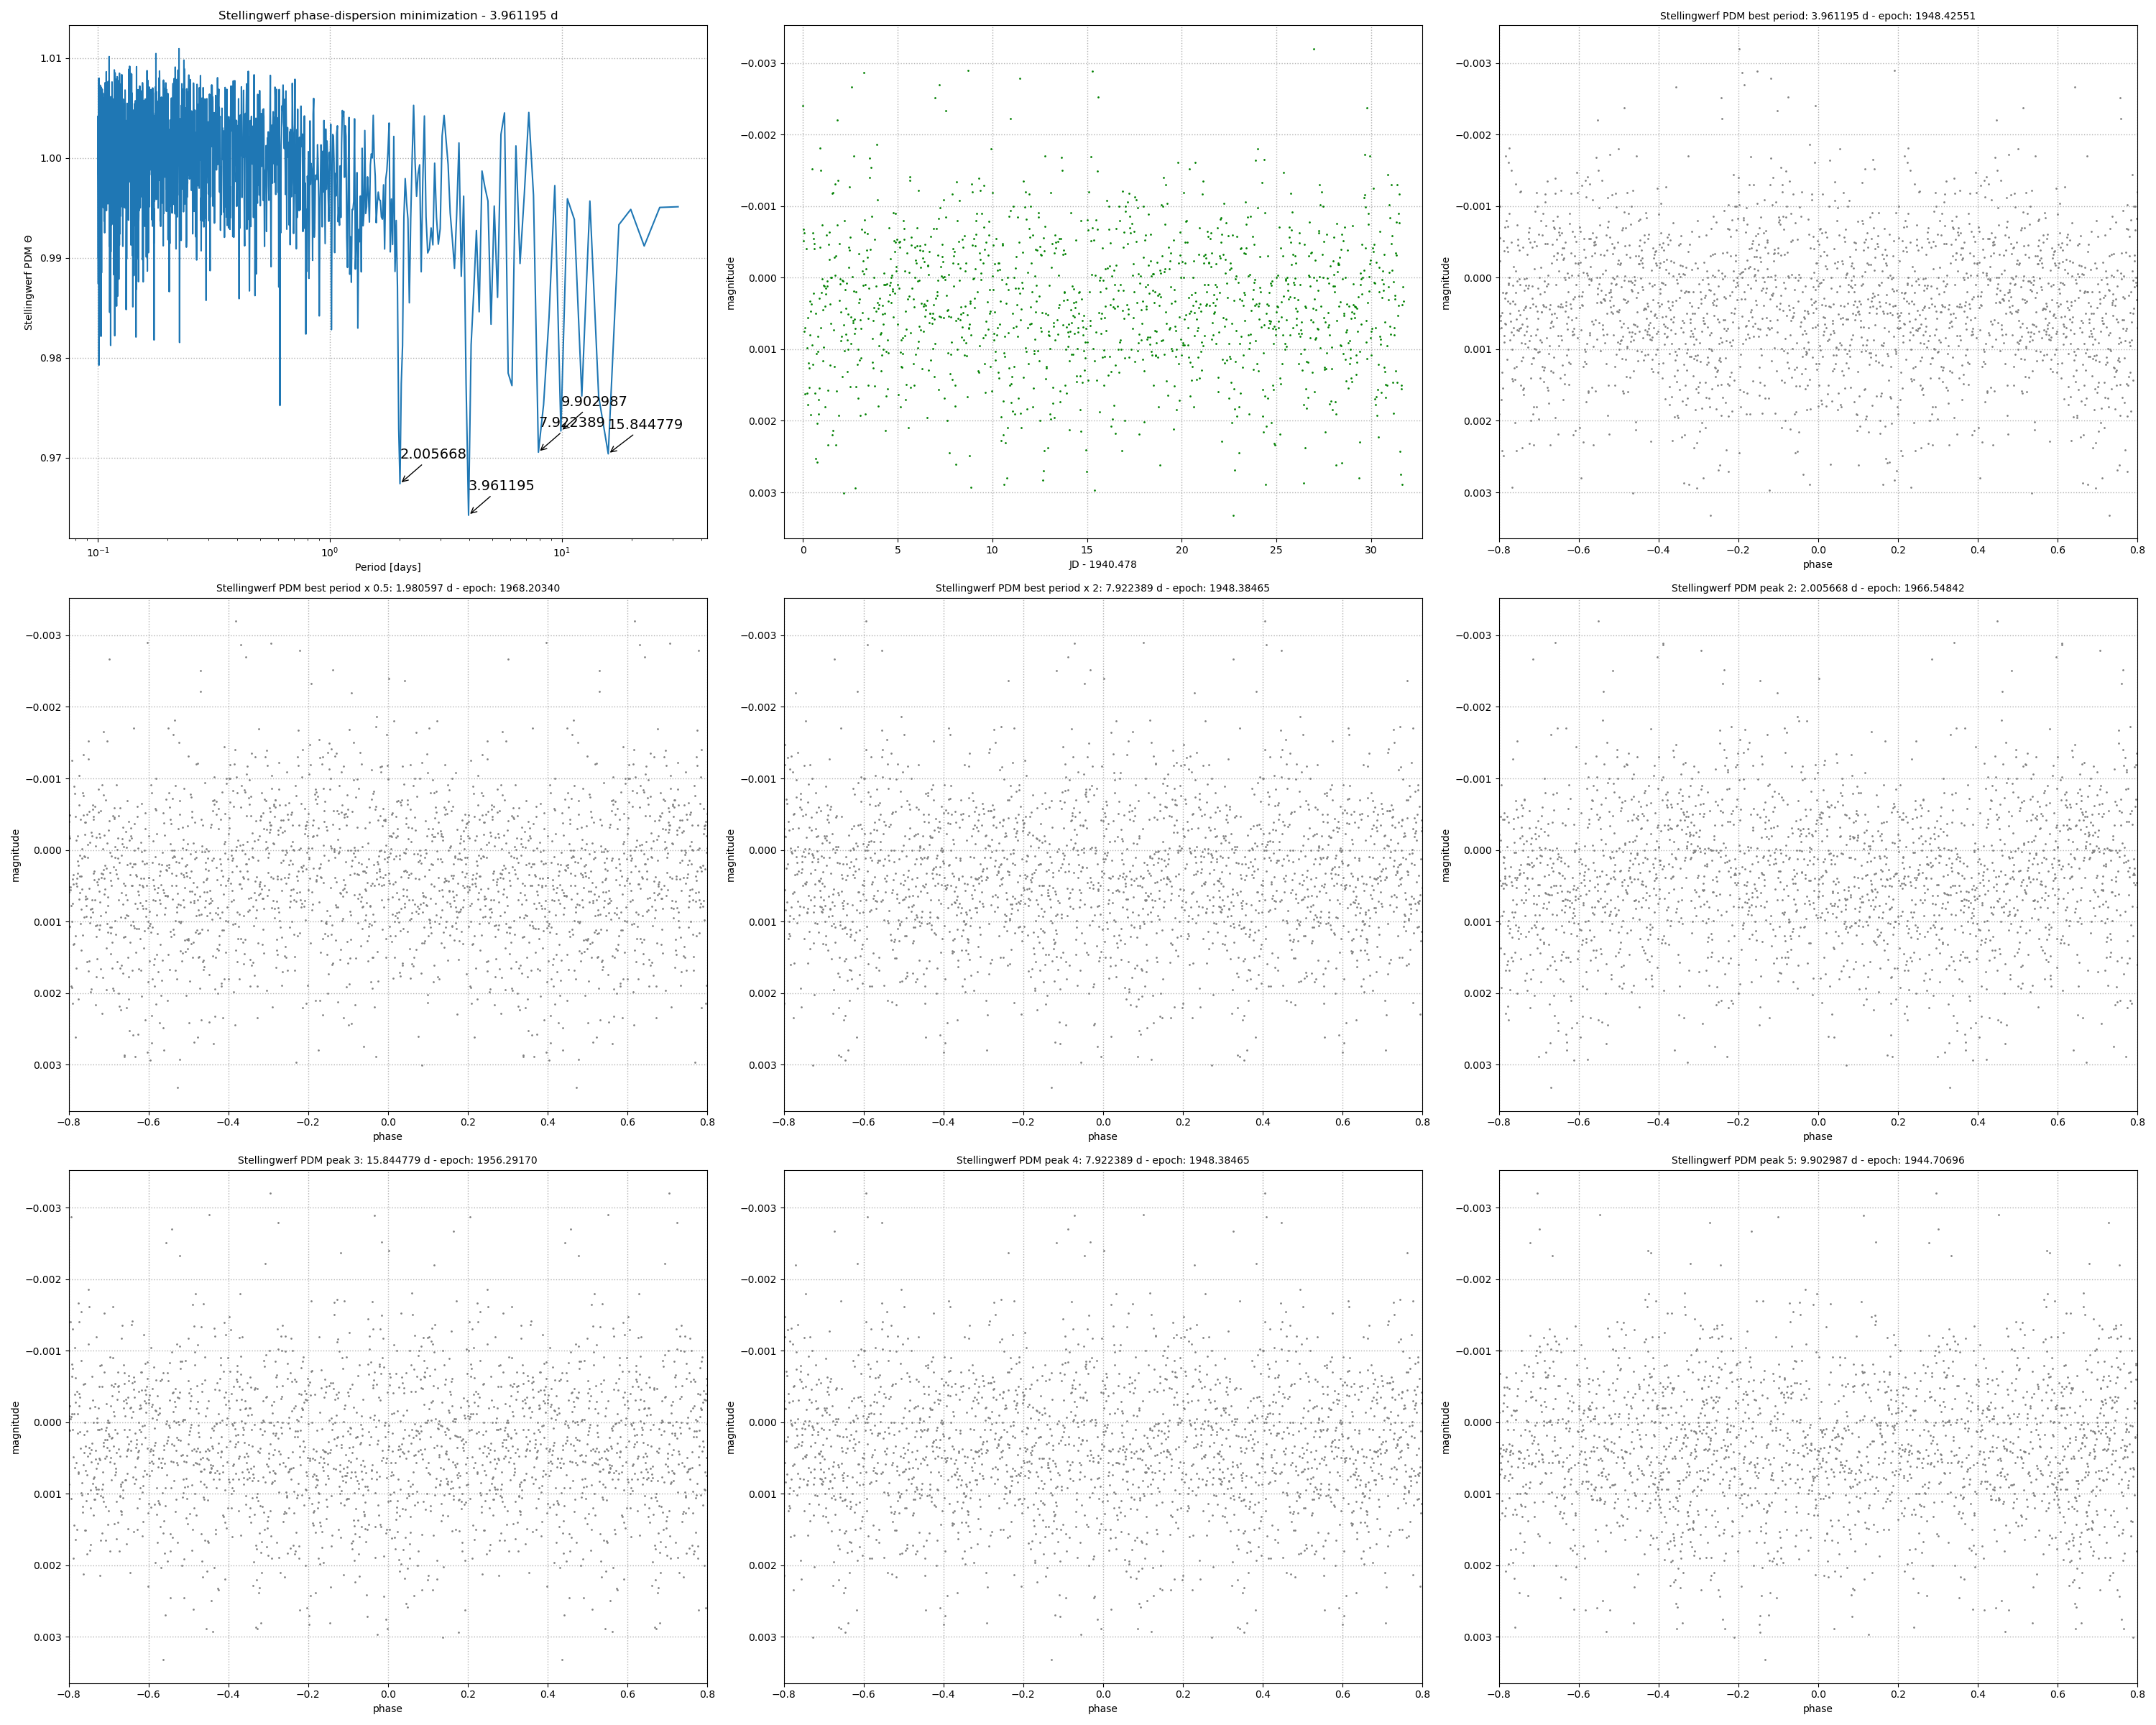

In [15]:
Image('0000809-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [3.961194643749991, 2.005668174050628, 15.844778574999964, 7.922389287499982, 9.902986609374977] (days)
